In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf


In [2]:
""" 공부만 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_studying = pd.read_csv("keypoint_studying.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_studying

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.198871,0.781391,0.154452,0.787421,0.133364,0.745978,0.134638,0.694983,0.105760,0.589361,0.478517,0.692546,0.346544,0.389911,0.773012,0.801967,0.775933,0.541181,0.775754,0.954916,0.758367,0.876276
1,0.292814,0.597660,0.220513,0.656164,0.221686,0.529168,0.218681,0.707080,0.221475,0.424813,0.451555,0.838570,0.433676,0.263632,0.759121,0.977992,0.775824,0.069817,0.834139,0.832147,0.778759,0.455216
2,0.296077,0.583190,0.245438,0.606826,0.227935,0.531038,0.256828,0.565092,0.235115,0.385950,0.523361,0.679356,0.459907,0.187493,0.814011,0.814376,0.811357,0.116539,0.846683,0.761080,0.804424,0.498170
3,0.297722,0.412686,0.227859,0.469517,0.251212,0.385285,0.230337,0.609132,0.270355,0.413283,0.454799,0.799264,0.526543,0.316455,0.812424,0.894230,0.821843,0.153446,0.841328,0.552788,0.883034,0.065642
4,0.246339,0.620141,0.181839,0.665390,0.183311,0.550709,0.202659,0.700963,0.209255,0.443612,0.463405,0.834408,0.434541,0.287524,NaN,NaN,0.774592,0.103094,NaN,NaN,0.760045,0.473605
5,0.214149,0.398930,0.156977,0.468472,0.156410,0.355387,0.200978,0.571756,0.184487,0.312448,0.426143,0.717825,0.457674,0.188350,0.777700,0.852081,0.791284,0.011403,0.773291,0.502429,NaN,NaN
6,0.287444,0.361868,0.205873,0.418355,0.228522,0.302157,0.187249,0.526382,0.223759,0.235652,0.356105,0.672309,0.432469,0.155495,0.757452,0.714436,0.791299,0.032149,0.513111,0.344433,0.514150,0.292354
7,0.251208,0.681805,0.188653,0.740573,0.170676,0.614722,0.190471,0.789209,0.154727,0.500332,0.426504,0.876267,0.361690,0.333349,0.784990,0.971122,0.733164,0.308534,0.587029,0.788146,0.544801,0.726613
8,0.240716,0.626853,0.179679,0.682891,0.177470,0.562606,0.169588,0.734348,0.172365,0.453042,0.390305,0.833765,0.354000,0.299552,0.799688,0.938068,0.728953,0.309798,NaN,NaN,0.745610,0.661270
9,0.264122,0.679964,0.191356,0.734636,0.185606,0.608714,0.174918,0.780390,0.167252,0.484271,0.394362,0.853358,0.339394,0.317326,0.796628,0.929726,0.730668,0.300879,0.498234,0.829811,0.747859,0.662205


In [3]:
np.sum(keypoint_studying.isnull())

nose_X               2
nose_Y               2
left_eye_X           3
left_eye_Y           3
right_eye_X          3
right_eye_Y          3
left_ear_X           3
left_ear_Y           3
right_ear_X          4
right_ear_Y          4
left_shoulder_X      5
left_shoulder_Y      5
right_shoulder_X     4
right_shoulder_Y     4
left_elbow_X        14
left_elbow_Y        14
right_elbow_X        9
right_elbow_Y        9
left_wrist_X        20
left_wrist_Y        20
right_wrist_X       17
right_wrist_Y       17
dtype: int64

In [4]:
keypoint_studying.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,63.000000,63.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,61.000000,61.000000,60.000000,60.000000,61.000000,61.000000,51.000000,51.000000,56.000000,56.000000,45.000000,45.000000,48.000000,48.000000
mean,0.328181,0.540382,0.268019,0.568450,0.266008,0.499500,0.247810,0.571878,0.242706,0.413631,0.465855,0.654241,0.454815,0.280260,0.763626,0.736657,0.757197,0.230778,0.760713,0.685401,0.775476,0.417413
std,0.076014,0.147402,0.074818,0.146083,0.077239,0.144973,0.071483,0.142978,0.075100,0.118560,0.073331,0.201267,0.071045,0.157662,0.057648,0.208318,0.116730,0.191228,0.095381,0.217461,0.110701,0.198218
min,0.198871,0.234047,0.154452,0.237564,0.133364,0.187710,0.096799,0.230217,0.105760,0.173460,0.215656,0.025386,0.292258,0.011899,0.594314,0.122564,0.295916,0.006165,0.498234,0.045874,0.514150,0.045261
25%,0.276165,0.423536,0.215872,0.451476,0.215559,0.386564,0.204876,0.500824,0.204980,0.318028,0.426810,0.578257,0.427344,0.186200,0.735922,0.671283,0.732540,0.100114,0.730132,0.543194,0.730774,0.300709
50%,0.310985,0.593500,0.246288,0.610377,0.253745,0.532846,0.234323,0.577491,0.230263,0.429370,0.472100,0.687731,0.449197,0.276152,0.765675,0.779048,0.778101,0.167016,0.756483,0.744873,0.760192,0.444450
75%,0.369649,0.658888,0.309713,0.682334,0.306618,0.608108,0.261039,0.667214,0.259175,0.484896,0.508025,0.820173,0.476931,0.335508,0.797059,0.896767,0.802594,0.314788,0.805334,0.862096,0.859631,0.509890
max,0.506744,0.781391,0.436039,0.787421,0.437710,0.752287,0.419778,0.789209,0.434672,0.747476,0.616571,0.906525,0.608133,0.899346,0.899774,0.979588,0.958003,0.978865,0.965172,0.975060,0.962169,0.876276


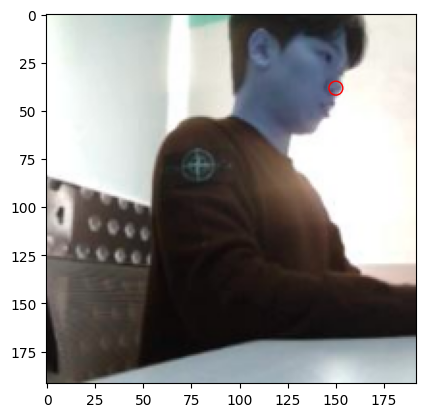

In [5]:
# test 
num = 0  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_studying[f"{point_check}Y"][num]*192,keypoint_studying[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

In [6]:
body_part = [ 'left_eye_', 'right_eye_','left_ear_','right_ear_',
       'left_shoulder_', 'right_shoulder_', 'left_elbow_', 'right_elbow_',
        'left_wrist_',  'right_wrist_','nose_']

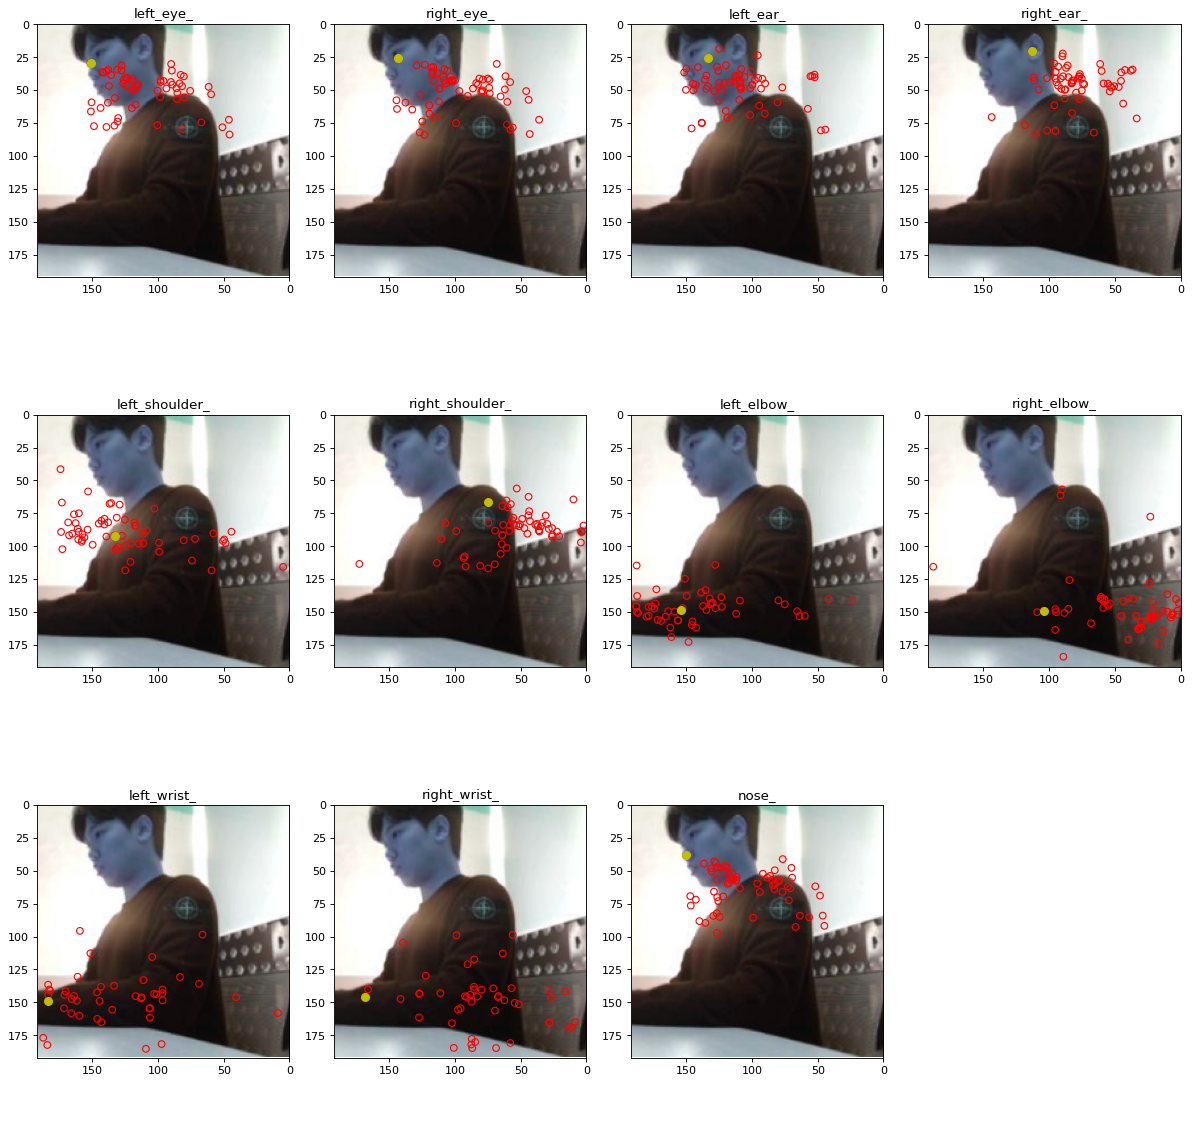

In [7]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"]*192,keypoint_studying[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"][num]*192,keypoint_studying[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


*------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [16]:
""" 딴짓 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_playing = pd.read_csv("keypoint_playing.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_playing

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.108453,0.188118,0.079799,0.211656,0.072383,0.147514,0.111603,0.208735,0.100037,0.060476,0.299707,0.170413,0.247275,0.023572,0.576063,0.216647,0.536024,0.012801,0.805590,0.238872,NaN,NaN
1,0.677465,0.812987,0.645498,0.844939,0.621500,0.806434,0.623116,0.827477,0.562600,0.719110,0.707359,0.740703,0.651252,0.582602,0.876349,0.847208,0.774261,0.665734,0.850941,0.847568,NaN,NaN
2,0.763106,0.781434,0.734840,0.802297,0.740616,0.758926,0.675707,0.753910,0.686617,0.650908,0.684126,0.716706,0.714174,0.583097,NaN,NaN,0.802755,0.663431,NaN,NaN,NaN,NaN
3,0.513464,0.876260,0.522626,0.892690,0.502404,0.861657,NaN,NaN,0.309888,0.722896,NaN,NaN,0.386204,0.440988,NaN,NaN,0.722418,0.315704,0.766020,0.807982,0.736633,0.681828
4,0.479964,0.623371,0.433713,0.603628,0.442803,0.598343,0.434241,0.424451,0.485424,0.463016,0.493061,0.300543,0.713526,0.291862,NaN,NaN,0.733711,0.508586,NaN,NaN,NaN,NaN
5,0.521531,0.589973,0.473475,0.601076,0.485722,0.577934,NaN,NaN,0.493198,0.473815,NaN,NaN,0.757305,0.317107,0.569600,0.470378,0.749674,0.524688,NaN,NaN,0.663315,0.739856
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650184,0.727414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.583743,0.544039,0.557096,0.569962,0.568590,0.530972,NaN,NaN,NaN,NaN,0.595668,0.597914,NaN,NaN,NaN,NaN,NaN,NaN,0.662316,0.754069,NaN,NaN
8,0.680351,0.784299,0.650247,0.821366,0.657888,0.783776,NaN,NaN,0.637115,0.743385,NaN,NaN,0.634737,0.697621,NaN,NaN,NaN,NaN,NaN,NaN,0.557193,0.516117
9,0.566159,0.523292,0.552217,0.543799,0.525137,0.508720,0.558807,0.505923,0.552240,0.438331,NaN,NaN,0.755073,0.269769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
np.sum(keypoint_playing.isnull())

nose_X               8
nose_Y               8
left_eye_X           9
left_eye_Y           9
right_eye_X          9
right_eye_Y          9
left_ear_X          16
left_ear_Y          16
right_ear_X         10
right_ear_Y         10
left_shoulder_X     19
left_shoulder_Y     19
right_shoulder_X    14
right_shoulder_Y    14
left_elbow_X        25
left_elbow_Y        25
right_elbow_X       20
right_elbow_Y       20
left_wrist_X        30
left_wrist_Y        30
right_wrist_X       28
right_wrist_Y       28
dtype: int64

In [18]:
keypoint_playing.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,48.000000,48.000000,47.000000,47.000000,47.000000,47.000000,40.000000,40.000000,46.000000,46.000000,37.000000,37.000000,42.000000,42.000000,31.000000,31.000000,36.000000,36.000000,26.000000,26.000000,28.000000,28.000000
mean,0.541889,0.537095,0.494655,0.564020,0.490901,0.521084,0.441990,0.546843,0.450282,0.470586,0.585366,0.591353,0.589031,0.376900,0.800972,0.607882,0.777262,0.418715,0.684861,0.628880,0.676142,0.579549
std,0.188142,0.212265,0.194399,0.209697,0.194072,0.221801,0.177358,0.200412,0.173701,0.208193,0.117928,0.184103,0.129459,0.228802,0.156664,0.165800,0.129198,0.264575,0.131227,0.255979,0.125329,0.227931
min,0.108453,0.137208,0.079799,0.151899,0.072383,0.111595,0.100638,0.174659,0.100037,0.060476,0.299707,0.170413,0.247275,0.020238,0.330015,0.216647,0.327305,0.012801,0.470226,0.197861,0.521407,0.153094
25%,0.420157,0.354036,0.360728,0.383675,0.363049,0.355120,0.298413,0.397191,0.304705,0.308466,0.498378,0.446453,0.493164,0.131195,0.726327,0.506751,0.719692,0.247241,0.575386,0.367275,0.572713,0.337632
50%,0.552936,0.541583,0.488687,0.569962,0.497719,0.543533,0.437146,0.544829,0.455409,0.455641,0.595668,0.613071,0.599970,0.342273,0.806153,0.598975,0.779327,0.432019,0.687416,0.659163,0.656149,0.614255
75%,0.665836,0.692647,0.606358,0.718316,0.608743,0.667148,0.563945,0.735602,0.587042,0.635460,0.680674,0.737867,0.679490,0.577164,0.956154,0.705823,0.846535,0.634035,0.805306,0.827417,0.781008,0.751257
max,0.987339,0.913703,0.954174,0.923202,0.972064,0.925326,0.806643,0.876027,0.758153,0.820420,0.860472,0.919142,0.790472,0.805433,0.981062,0.963679,0.977757,0.908205,0.919722,0.968574,0.966822,0.919790


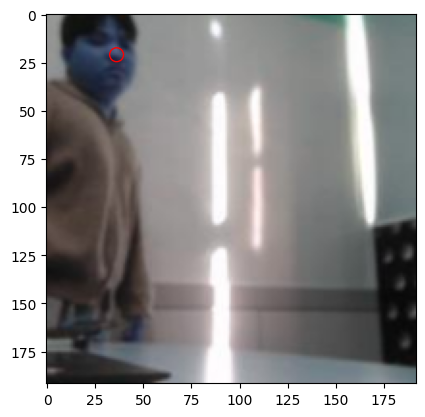

In [20]:
# test 
num = 0  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_playing[f"{point_check}Y"][num]*192,keypoint_playing[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

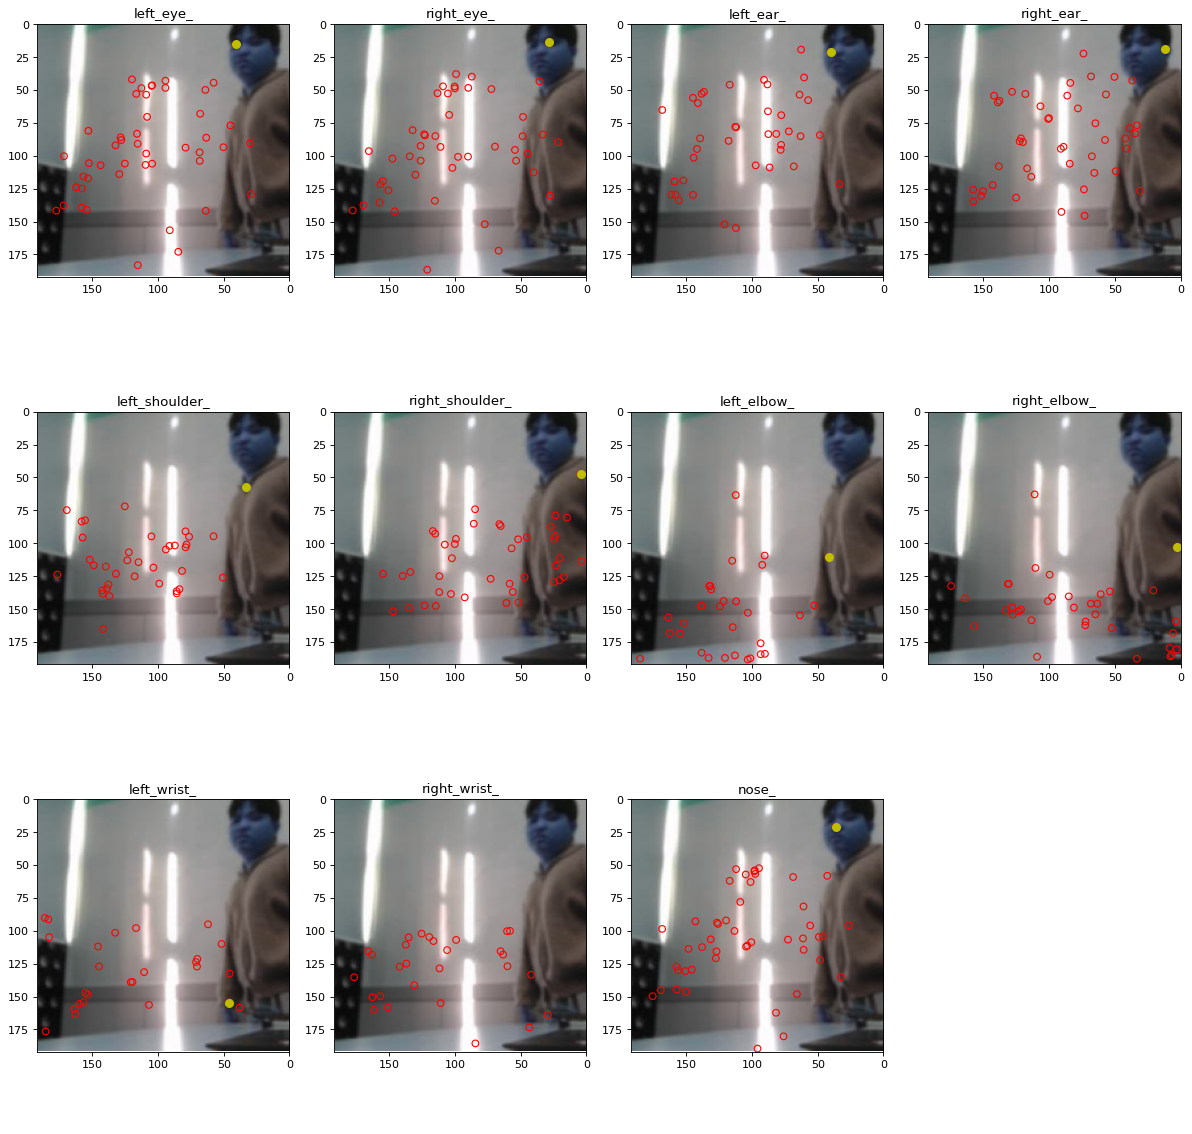

In [23]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"]*192,keypoint_playing[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"][num]*192,keypoint_playing[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()
